## Pothole Reports - Final Exam Practice

In [1]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

In [2]:
import pandas as pd
df = pd.read_csv("dataPotholes.csv")
df

,Date,PotholeReports,Temperature,Humidity,WindSpeed,Rainfall,ExpectedWorkload
0,2019-11-21,254,65.2,37,2.200000,NaN,Low
1,2019-11-21,204,65.5,38,0.800000,NaN,Low
2,2019-11-21,173,66.0,39,1.000000,NaN,Low
3,2019-11-21,107,66.2,40,0.900000,NaN,Low
4,2019-11-21,78,66.0,36,2.300000,NaN,Low
...,...,...,...,...,...,...,...
8755,2020-11-19,1003,55.8,34,8.530184,NaN,Low
8756,2020-11-19,764,56.6,37,7.545932,NaN,Low
8757,2020-11-19,694,57.4,39,0.984252,NaN,Low
8758,2020-11-19,712,57.9,41,3.280840,NaN,Low


In [3]:
df.dtypes

Date                 object
PotholeReports        int64
Temperature         float64
Humidity              int64
WindSpeed           float64
Rainfall            float64
ExpectedWorkload     object
dtype: object

### Feature Engineering Steps

In [4]:
df["Date2"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")

In [5]:
df.dtypes

Date                        object
PotholeReports               int64
Temperature                float64
Humidity                     int64
WindSpeed                  float64
Rainfall                   float64
ExpectedWorkload            object
Date2               datetime64[ns]
dtype: object

In [7]:
df["WindSpeed2"] = df["WindSpeed"]

In [8]:
df.loc[df["Date2"] > '2020-05-21', "WindSpeed2"] = df["WindSpeed2"]/3.3

In [9]:
df["WindSpeed"].describe()

count    8760.000000
mean        3.487925
std         2.775663
min         0.000000
25%         1.400000
50%         2.700000
75%         4.593176
max        22.637796
Name: WindSpeed, dtype: float64

In [10]:
df["WindSpeed2"].describe()

count    8760.000000
mean        1.720421
std         1.034708
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: WindSpeed2, dtype: float64

In [11]:
df.isna().sum()

Date                   0
PotholeReports         0
Temperature            0
Humidity               0
WindSpeed              0
Rainfall            8232
ExpectedWorkload       0
Date2                  0
WindSpeed2             0
dtype: int64

In [12]:
df["Rainfall2"] = df["Rainfall"]

In [13]:
df.loc[df["Rainfall2"].isna(), "Rainfall2"] = 0

In [14]:
df.isna().sum()

Date                   0
PotholeReports         0
Temperature            0
Humidity               0
WindSpeed              0
Rainfall            8232
ExpectedWorkload       0
Date2                  0
WindSpeed2             0
Rainfall2              0
dtype: int64

In [15]:
df["Weekday"] = df["Date2"].dt.day_name()

In [17]:
df["Month"] = df["Date2"].dt.month_name()

In [18]:
df

,Date,PotholeReports,Temperature,Humidity,WindSpeed,Rainfall,ExpectedWorkload,Date2,WindSpeed2,Rainfall2,Weekday,Month
0,2019-11-21,254,65.2,37,2.200000,NaN,Low,2019-11-21,2.200000,0.0,Thursday,November
1,2019-11-21,204,65.5,38,0.800000,NaN,Low,2019-11-21,0.800000,0.0,Thursday,November
2,2019-11-21,173,66.0,39,1.000000,NaN,Low,2019-11-21,1.000000,0.0,Thursday,November
3,2019-11-21,107,66.2,40,0.900000,NaN,Low,2019-11-21,0.900000,0.0,Thursday,November
4,2019-11-21,78,66.0,36,2.300000,NaN,Low,2019-11-21,2.300000,0.0,Thursday,November
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2020-11-19,1003,55.8,34,8.530184,NaN,Low,2020-11-19,2.584904,0.0,Thursday,November
8756,2020-11-19,764,56.6,37,7.545932,NaN,Low,2020-11-19,2.286646,0.0,Thursday,November
8757,2020-11-19,694,57.4,39,0.984252,NaN,Low,2020-11-19,0.298258,0.0,Thursday,November
8758,2020-11-19,712,57.9,41,3.280840,NaN,Low,2020-11-19,0.994194,0.0,Thursday,November


### Econometric Modeling

In [19]:
import statsmodels.formula.api as smf
resultLM = smf.ols("PotholeReports ~ Temperature + Humidity + WindSpeed2 + Rainfall2 +\
                    Weekday + Month", data = df).fit()
print(resultLM.summary())

                            OLS Regression Results                            
Dep. Variable:         PotholeReports   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     317.9
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:00:50   Log-Likelihood:                -66614.
No. Observations:                8760   AIC:                         1.333e+05
Df Residuals:                    8738   BIC:                         1.334e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2729.9963 

<Axes: ylabel='Frequency'>

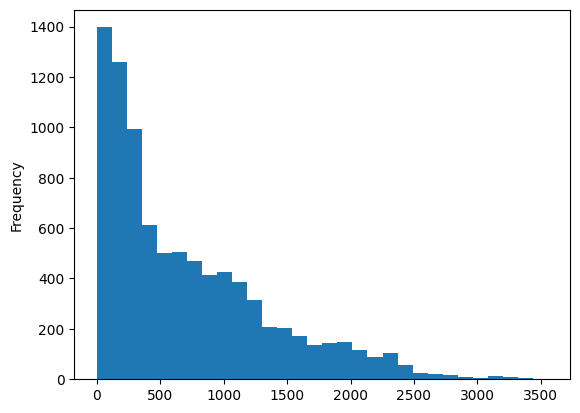

In [20]:
df["PotholeReports"].plot.hist(bins = 30)

In [21]:
resultPoisson = smf.poisson("PotholeReports ~ Temperature + Humidity + WindSpeed2 + Rainfall2 +\
                    Weekday + Month", data = df).fit()
print(resultPoisson.summary())

Optimization terminated successfully.
         Current function value: 147.923092
         Iterations 8
                          Poisson Regression Results                          
Dep. Variable:         PotholeReports   No. Observations:                 8760
Model:                        Poisson   Df Residuals:                     8738
Method:                           MLE   Df Model:                           21
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.4864
Time:                        02:07:03   Log-Likelihood:            -1.2958e+06
converged:                       True   LL-Null:                   -2.5232e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.0713      0.005   1934.598      0.000       9.062       9.0

### Machine Learning - Preparing the Data

In [22]:
outcome = df["ExpectedWorkload"]

In [23]:
numericFeatures = df[["Temperature", "Humidity", "Rainfall2", "WindSpeed2"]]

In [24]:
dummiesWeekday = pd.get_dummies(df["Weekday"], prefix = "Weekday", drop_first = True)

In [27]:
dummiesMonth = pd.get_dummies(df["Month"], prefix = "Month", drop_first = True)

In [28]:
features = pd.concat([numericFeatures, dummiesWeekday, dummiesMonth], axis = 1)

In [29]:
features

,Temperature,Humidity,Rainfall2,WindSpeed2,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,65.2,37,0.0,2.200000,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,65.5,38,0.0,0.800000,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,66.0,39,0.0,1.000000,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,66.2,40,0.0,0.900000,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,66.0,36,0.0,2.300000,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,55.8,34,0.0,2.584904,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
8756,56.6,37,0.0,2.286646,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
8757,57.4,39,0.0,0.298258,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
8758,57.9,41,0.0,0.994194,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
featuresTrain, featuresTest, outcomeTrain, outcomeTest = train_test_split(features, outcome, test_size = 0.33, random_state = 42)

### Machine Learning Models

In [32]:
import sklearn.tree
modelTree = sklearn.tree.DecisionTreeClassifier(random_state = 42)
modelTree.fit(featuresTrain, outcomeTrain)

DecisionTreeClassifier(random_state=42)

In [33]:
predTreeTrain = modelTree.predict(featuresTrain)
predTreeTest = modelTree.predict(featuresTest)

In [34]:
import sklearn.metrics
print(sklearn.metrics.classification_report(outcomeTrain, predTreeTrain))
print(sklearn.metrics.classification_report(outcomeTest, predTreeTest))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       176
         Low       1.00      1.00      1.00      4492
      Medium       1.00      1.00      1.00      1201

    accuracy                           1.00      5869
   macro avg       1.00      1.00      1.00      5869
weighted avg       1.00      1.00      1.00      5869

              precision    recall  f1-score   support

        High       0.19      0.18      0.19        92
         Low       0.83      0.84      0.84      2227
      Medium       0.35      0.35      0.35       572

    accuracy                           0.72      2891
   macro avg       0.46      0.46      0.46      2891
weighted avg       0.72      0.72      0.72      2891



In [35]:
import sklearn.ensemble
modelForest = sklearn.ensemble.RandomForestClassifier(random_state = 42)
modelForest.fit(featuresTrain, outcomeTrain)
predForestTrain = modelForest.predict(featuresTrain)
predForestTest = modelForest.predict(featuresTest)
print(sklearn.metrics.classification_report(outcomeTrain, predForestTrain))
print(sklearn.metrics.classification_report(outcomeTest, predForestTest))

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       176
         Low       1.00      1.00      1.00      4492
      Medium       1.00      1.00      1.00      1201

    accuracy                           1.00      5869
   macro avg       1.00      1.00      1.00      5869
weighted avg       1.00      1.00      1.00      5869

              precision    recall  f1-score   support

        High       0.19      0.05      0.08        92
         Low       0.84      0.92      0.88      2227
      Medium       0.48      0.37      0.42       572

    accuracy                           0.78      2891
   macro avg       0.50      0.45      0.46      2891
weighted avg       0.75      0.78      0.76      2891



In [36]:
import sklearn.neural_network
modelNeural = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (40,40), random_state = 42)
modelNeural.fit(featuresTrain, outcomeTrain)
predNeuralTrain = modelNeural.predict(featuresTrain)
predNeuralTest = modelNeural.predict(featuresTest)
print(sklearn.metrics.classification_report(outcomeTrain, predNeuralTrain))
print(sklearn.metrics.classification_report(outcomeTest, predNeuralTest))

MLPClassifier(hidden_layer_sizes=(40, 40), random_state=42)

              precision    recall  f1-score   support

        High       0.00      0.00      0.00       176
         Low       0.81      0.96      0.88      4492
      Medium       0.52      0.25      0.34      1201

    accuracy                           0.78      5869
   macro avg       0.44      0.40      0.40      5869
weighted avg       0.73      0.78      0.74      5869

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        92
         Low       0.81      0.96      0.88      2227
      Medium       0.46      0.20      0.28       572

    accuracy                           0.78      2891
   macro avg       0.42      0.39      0.39      2891
weighted avg       0.72      0.78      0.73      2891



/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/